<a href="https://colab.research.google.com/github/BillyTevin11/Python-Based-Spatial-Solutions/blob/main/Thermal%20Sharpening%20(T_Sharp)%20using%20Random%20Forest%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Thermal Sharpening using a Random Forest Model**

### Thermal Sharpening

* **Thermal sharpening**, also known as **thermal sharpening fusion or pan-sharpening** for
thermal imagery, is a technique used to enhance the spatial resolution of thermal images by integrating them with higher-resolution optical or panchromatic images.



* This process helps in improving the clarity and detail of thermal data, which is often captured at coarser spatial resolutions compared to visible or near-infrared bands.

### Why is Thermal Sharpening Needed?


Thermal sensors on satellites like **Landsat, MODIS, ASTER, and VIIRS** typically have lower spatial resolution compared to optical sensors. For instance:
* **Landsat 8**:

Thermal Infrared Sensor (TIRS) bands have a 100m resolution.
Operational Land Imager (OLI) bands have a 30m resolution.

* **MODIS**:

Thermal bands have a 1000m (1km) resolution, much coarser than optical bands (~250m).

This difference in spatial resolution makes it difficult to analyze thermal variations at finer scales. Thermal sharpening techniques bridge this gap by using high-resolution optical data to enhance thermal imagery.

### Thermal Sharpening Techniques

1. **Regression-Based Methods**

* Uses a statistical relationship between high-resolution optical data (e.g., NDVI, vegetation indices) and thermal data.
* Assumes that surface temperature variations correlate with land cover type.

2. **Wavelet Transform Techniques**

* Applies multi-scale decomposition (wavelet transforms) to blend thermal and optical images while preserving key features.

3. **High-Resolution Visible & Near-Infrared Data (HRV-NIR)**

* Uses high-resolution visible and near-infrared data to guide thermal sharpening.
* Example: Landsat’s 30m optical bands can be used to sharpen its 100m thermal bands.

4. **Hybrid and AI-Based Methods**

* Machine learning (e.g., Random Forest, Neural Networks) and deep learning models improve sharpening accuracy by learning complex relationships between optical and thermal bands.

### Applications of Thermal Sharpening


✅ **Urban Heat Island Studies** – Provides detailed temperature variations in cities.

✅ **Precision Agriculture** – Detects crop stress and irrigation needs at finer scales.

✅ **Wildfire Monitoring** – Enhances fire detection and hotspot mapping.

✅ **Energy Efficiency & Heat Loss Detection** – Assists in identifying poorly insulated buildings.

✅ **Environmental Monitoring** – Tracks thermal pollution in water bodies and land surfaces.

### Random Forest (RF) Model in Remote Sensing

**Random Forest (RF)** is a machine learning algorithm based on ensemble decision trees.

It is widely used in remote sensing applications, including thermal sharpening, due to its ability to handle complex relationships between different spectral bands, vegetation indices, and temperature variations.


**How Random Forest is Applied in Thermal Sharpening?**

Thermal sharpening involves enhancing the spatial resolution of coarse thermal images using higher-resolution optical data (e.g., from visible and near-infrared bands).

Random Forest helps predict high-resolution thermal values by learning patterns between thermal and optical features.

**Key Steps in Using RF for Thermal Sharpening**:
1. **Data Collection and Preprocessing**

* Gather coarse-resolution thermal images (e.g., from Landsat TIRS, MODIS).
* Collect high-resolution optical images (e.g., NDVI, NDBI, SAVI from Landsat OLI or Sentinel-2).
* Resample the optical images to match the target high resolution.

2. **Feature Selection**

* Select key predictors from optical bands and vegetation indices (e.g., NDVI, LST, texture features).
*  The assumption is that land surface temperature correlates with land cover.

3. **Training the Random Forest Model**

* Train the RF model using high-resolution thermal data from another source (e.g., airborne thermal sensors or historical high-resolution datasets) as ground truth.

* Use the selected optical predictors as input features and the coarse-resolution thermal data as the dependent variable.

4. **Prediction & Thermal Sharpening**

* The trained RF model predicts high-resolution thermal values at finer scales.
* The output is an enhanced thermal image that retains realistic temperature variations.

### **Important**

*Apply the logic of 1 Angular Degree = 100Km where applicable. Such a case would be where a Gographic Coordinate System is used for CRS Definition and imposes the use of Lon/Lat Parameters.*

# **T-Sharp Execution**

## Importing Necessary Libraries

In [ ]:
import ee
import geemap
import xarray as xr

In [ ]:
!pip install xee
import xee

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.8 MB/s eta 0:00:00


## Project Initialization

In [ ]:
ee.Authenticate()

ee.Initialize(
    project='ee-vindevon11',
    opt_url='https://earthengine-highvolume.googleapis.com')

## Identification of Area of Interest via Geometry Plotting

In [ ]:
map = geemap.Map(basemap = "SATELLITE")
map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [ ]:
roi = map.draw_last_feature.geometry()
roi

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "Feature.geometry",
    "arguments": {
      "feature": {
        "functionInvocationValue": {
          "functionName": "Feature",
          "arguments": {
            "geometry": {
              "functionInvocationValue": {
                "functionName": "GeometryConstructors.Polygon",
                "arguments": {
                  "coordinates": {
                    "constantValue": [
                      [
                        [
                          48.251953,
                          31.341909
                        ],
                        [
                          48.251953,
                          31.898546
                        ],
                        [
                          49.117126,
                          31.898546
                        ],
                        [
                          49.117126,
                          31.341909
                        ],
                        [
                          48.251953,
                          31.341909
                        ]
                      ]
                    ]
                  },
                  "geodesic": {
                    "constantValue": false
                  }
                }
              }
            }
          }
        }
      }
    }
  }
})

## Importing MODIS Terra Land Surface Temperature and Emissivity 8-Day Global 1km

The MOD11A2 V6.1 product provides an average 8-day land surface temperature (LST) in a 1200 x 1200 kilometer grid.

Each pixel value in MOD11A2 is a simple average of all the corresponding MOD11A1 LST pixels collected within that 8 day period.

The MOD11A2 does a simple averaging of all daily LST values.

In [ ]:
lst = ee.ImageCollection("MODIS/061/MOD11A2").filterDate('2020', '2021').select('LST_Day_1km').mean().multiply(0.02).subtract(273.15)

## Importing MODIS Terra Vegetation Indices 16-Day Global 250m

The MOD13Q1 V6.1 product provides a Vegetation Index (VI) value at a per pixel basis.

There are two primary vegetation layers. The first is the Normalized Difference Vegetation Index (NDVI) which is referred to as the continuity index to the existing National Oceanic and Atmospheric Administration-Advanced Very High Resolution Radiometer (NOAA-AVHRR) derived NDVI.

The MODIS NDVI product is computed from atmospherically corrected bi-directional surface reflectances that have been masked for water, clouds, heavy aerosols, and cloud shadows.

In [ ]:
ndvi = ee.ImageCollection("MODIS/061/MOD13Q1").filterDate('2020', '2021').select('NDVI').mean().multiply(0.0001)

## Stacking Extracted Land Surface Temperature and NDVI as Bands in a Single Image

In [ ]:
stack = ee.Image.cat([lst, ndvi]).select([0,1], ['lst', 'ndvi'])
stack

## Converting the Newly Stacked Image to an XArray Data Structure at 1 Km Spatial Resolution

In [ ]:
ds1km = xr.open_dataset(stack, engine='ee', crs = 'EPSG:4326', scale = 0.01, geometry = roi )

## Converting the Newly Stacked Image to an XArray Data Structure at 250 m Spatial Resolution

In [ ]:
ds250m = xr.open_dataset(stack, engine='ee', crs = 'EPSG:4326', scale = 0.0025, geometry = roi )

## Converting the 1 Km and 250 m Spatial Resolution Data Structures to Data Frames

In [ ]:
df1km = ds1km.to_dataframe()
df250m = ds250m.to_dataframe()

In [ ]:
df1km

lst      ndvi
time lon       lat                           
0    48.256953 31.346909  37.240002  0.192352
               31.356909  36.709999  0.205465
               31.366909  35.832607  0.292387
               31.376909  35.391739  0.289596
               31.386909  35.524784  0.174622
...                             ...       ...
     49.116953 31.856909  37.451740  0.154526
               31.866909  37.669998  0.159004
               31.876909  37.966957  0.194270
               31.886909  37.876957  0.189409
               31.896909  38.450443  0.200957

[4872 rows x 2 columns]

Define ndvi as the predictor variable, x, and lst as the predicted variable, y.

In [ ]:
x = df1km[['ndvi']]
y = df1km['lst']

In [ ]:
from sklearn.model_selection import train_test_split

## Split the Training and Testing Data in a 95:5 Percent Ratio

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.05,
                                                    random_state = 42)

## Import the Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

## Predicting Land Surface Temperature at 1 Km Spatial Resolution using the Testing Predictor Variable i.e., NDVI

In [ ]:
y_pred = model.predict(x_test)

## Compute the Mean Square Error, Root Mean Square Error and R Squared for the RF Model Above

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
import numpy as np

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'RMSE:{rmse}')
print(f'R2:{r2}')

RMSE:2.3568550457414563
R2:0.6439575017272168


## Add a new variable to the 250 m Spatial Resolution Data Frame and assign the NDVI at 250 m resolution as the Predictor Variable to the Model created above whose metrics we just computed

In [ ]:
df250m['lst_sharp'] = model.predict(df250m[['ndvi']])

In [ ]:
df250m

lst      ndvi  lst_sharp
time lon       lat                                      
0    48.253203 31.343159  37.240002  0.209152  40.536748
               31.345659  37.240002  0.196548  39.126259
               31.348159  37.240002  0.171857  39.920723
               31.350659  37.361111  0.203587  38.734941
               31.353159  37.361111  0.208917  37.463435
...                             ...       ...        ...
     49.115703 31.888159  37.876957  0.188761  39.487868
               31.890659  37.876957  0.191935  39.724606
               31.893159  38.450443  0.200022  42.335052
               31.895659  37.691738  0.226591  34.392060
               31.898159  37.691738  0.201443  37.284943

[77158 rows x 3 columns]

## Convert the Data Frame at 250 m Spatial Resolution Back to an XArray Data Structure at 250 m Spatial Resolution to for visualization

In [ ]:
ds250 = df250m.to_xarray()

In [ ]:
ds250

<xarray.Dataset> Size: 1MB
Dimensions:    (time: 1, lon: 346, lat: 223)
Coordinates:
  * time       (time) int64 8B 0
  * lon        (lon) float64 3kB 48.25 48.26 48.26 48.26 ... 49.11 49.11 49.12
  * lat        (lat) float64 2kB 31.34 31.35 31.35 31.35 ... 31.89 31.9 31.9
Data variables:
    lst        (time, lon, lat) float32 309kB 37.24 37.24 37.24 ... 37.69 37.69
    ndvi       (time, lon, lat) float32 309kB 0.2092 0.1965 ... 0.2266 0.2014
    lst_sharp  (time, lon, lat) float64 617kB 40.54 39.13 39.92 ... 34.39 37.28

In [ ]:
import matplotlib.pyplot as plt

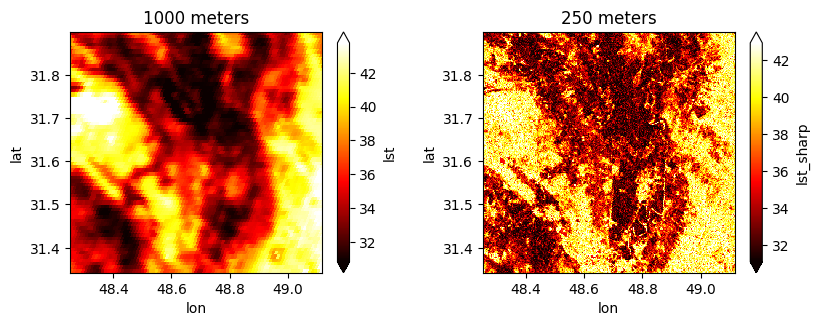

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (8,3))
plt.tight_layout(w_pad=4)

ds250.lst.plot(x = 'lon', y = 'lat', robust = True, cmap = 'hot', ax = ax[0])
ds250.lst_sharp.plot(x = 'lon', y = 'lat', robust = True, cmap = 'hot', ax = ax[1])

ax[0].set_title('1000 meters')
ax[1].set_title('250 meters')

#plt.savefig('thermalsharpening.png', dpi = 360, bbox_inches = 'tight')